In [7]:
import tensorflow as tf
import cv2,os
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import glob
from keras.models import load_model
model  = load_model("my_model_f.h5")
categories=["with_mask","without_mask"];       #list

[[2.6498967e-06 9.9999738e-01]]
result=  D:\temp\Face-Mask-Detector-main\stm32\img\N11.bmp is without_mask 

[[9.114358e-04 9.990885e-01]]
result=  D:\temp\Face-Mask-Detector-main\stm32\img\N12.bmp is without_mask 

[[0.03975931 0.9602407 ]]
result=  D:\temp\Face-Mask-Detector-main\stm32\img\N13.bmp is without_mask 

[[0.01601863 0.9839813 ]]
result=  D:\temp\Face-Mask-Detector-main\stm32\img\N14.bmp is without_mask 

[[0.9862385  0.01376154]]
result=  D:\temp\Face-Mask-Detector-main\stm32\img\P11.bmp is with_mask 

[[0.9984925  0.00150748]]
result=  D:\temp\Face-Mask-Detector-main\stm32\img\P12.bmp is with_mask 

[[0.9965546  0.00344538]]
result=  D:\temp\Face-Mask-Detector-main\stm32\img\P13.bmp is with_mask 

[[9.999670e-01 3.304353e-05]]
result=  D:\temp\Face-Mask-Detector-main\stm32\img\P14.bmp is with_mask 

[[9.9986100e-01 1.3903648e-04]]
result=  D:\temp\Face-Mask-Detector-main\stm32\img\P15.bmp is with_mask 



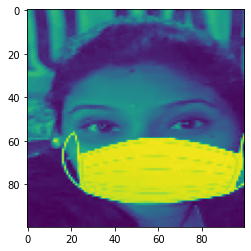

In [8]:
data_path = "D:\\temp\\Face-Mask-Detector-main\\stm32\\img\\"
img_names=glob.glob(os.path.join(data_path,"*.bmp"))
for img_name in img_names:
    img_path=os.path.join(data_path,img_name)
    img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    plt.imshow(img)
    img=np.array(img)
    #img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=img/255.0
    reshapeimage=np.reshape(img,(-1,100,100,1))
    reshapeimage;
    modelop=model.predict(reshapeimage)
    print(modelop)
    labelimg=np.argmax(modelop,axis=1)
    print("result= ",img_name ,'is', categories[labelimg[0]], '\n')

fasces is :  [[612  20 166 166]
 [336 116 151 151]]


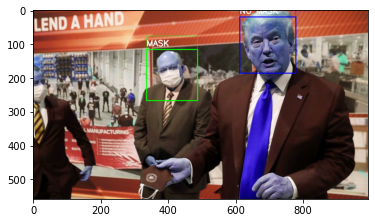

In [9]:
face_cascader=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
detectMultiScale_minval = 1.3;
detectMultiScale_maxval = 3;
img=cv2.imread("D:\\temp\\Face-Mask-Detector-main\\test6.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces=face_cascader.detectMultiScale(img,detectMultiScale_minval,detectMultiScale_maxval)


#plt.imshow(img)
#faces
print("fasces is : ", faces)

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

%matplotlib inline
#gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces=face_cascader.detectMultiScale(img,detectMultiScale_minval,detectMultiScale_maxval)

for (x,y,w,h) in faces:

    face_img=img[y:y+w,x:x+w]
    resized=cv2.resize(face_img,(100,100))
    #normalized=resized/255.0

    #result=model.predict(normalized)
    normimage=resized/255
    reshapeimage=np.reshape(normimage,(-1,100,100,1))
    modelop=model.predict(reshapeimage)

    label=np.argmax(modelop,axis=1)[1]

    cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
    cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],1)

    cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)

   # cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
   # cv2.rectangle(img,(x,y-40),(x+w,y),(0,0,255),1)

    #cv2.putText(img, "face", (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)


plt.imshow(img)